## Introduction

This project conducts an exploratory data analysis of a survey data on smoking habits from the United Kingdom. The data set can be used for analyzing the demographic characteristics of smokers and types of tobacco consumed. A data frame with 1691 observations and 12 variables.
https://www.kaggle.com/datasets/utkarshx27/smoking-dataset-from-uk/data

| Variable | Description |
| :- | :- |
| gender | Gender with levels Female and Male |
| age | Age |
| marital_status | Marital status with levels Divorced, Married, Separated, Single and Widowed |
| highest_qualification | Highest education level with levels A Levels, Degree, GCSE/CSE, GCSE/O Level, Higher/Sub Degree, No Qualification, ONC/BTEC and Other/Sub Degree |
| nationality | Nationality with levels British, English, Irish, Scottish, Welsh, Other, Refused and Unknown |
| ethnicity | Ethnicity with levels Asian, Black, Chinese, Mixed, White and Refused Unknown |
| gross_income | Gross income with levels Under 2,600, 2,600 to 5,200, 5,200 to 10,400, 10,400 to 15,600, 15,600 to 20,800, 20,800 to 28,600, 28,600 to 36,400, Above 36,400, Refused and Unknown |
| region | Region with levels London, Midlands And East Anglia, Scotland, South East, South West, The North and Wales |
| smoke | Smoking status with levels No and Yes |
| amt_weekends | Number of cigarettes smoked per day on weekends |
| amt_weekdays | Number of cigarettes smoked per day on weekdays |
| type | Type of cigarettes smoked with levels Packets, Hand-Rolled, Both/Mainly Packets and Both/Mainly Hand-Rolled |

We begin by importing the dataset and do some transformations to set it in order.

## Import data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/smoking.csv")

In [3]:
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [4]:
df.describe()

,Unnamed: 0,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,421.000000,421.000000
mean,846.000000,49.836192,16.410926,13.750594
std,488.293969,18.736851,9.892988,9.388292
min,1.000000,16.000000,0.000000,0.000000
25%,423.500000,34.000000,10.000000,7.000000
50%,846.000000,48.000000,15.000000,12.000000
75%,1268.500000,65.500000,20.000000,20.000000
max,1691.000000,97.000000,60.000000,55.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


In [6]:
df.isna().sum()

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

## Cleaning data

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
def process_income_range(income_range):
    # Remove commas
    income_range = income_range.replace(',', '')
    
    # Handle specific patterns
    if 'to' in income_range:
        # Range (e.g., '20,800 to 28,600')
        lower, upper = income_range.split(' to ')
        return int(lower), int(upper)
    elif 'Under' in income_range:
        # Under (e.g., 'Under 2,600')
        upper = income_range.replace('Under ', '')
        return 0, int(upper)
    elif 'Above' in income_range:
        # Above (e.g., 'Above 36,400')
        lower = income_range.replace('Above ', '')
        return int(lower), np.inf
    else:
        # Unknown or refused
        return np.nan, np.nan

In [9]:
df[['lower_income', 'upper_income']] = df['gross_income'].apply(lambda x: pd.Series(process_income_range(x)))
df['midincome_range'] = np.mean(df[['lower_income', 'upper_income']], axis=1).replace(np.inf, 80_000)
# sets up two columns with lower income and higher income range
df = df.drop('gross_income', axis=1)

In [10]:
no_smoke_rows = df.loc[df['smoke'] == 'No']
df.loc[no_smoke_rows.index, ['amt_weekends', 'amt_weekdays']] = 0
df.loc[no_smoke_rows.index, 'type'] = 'Non-Smoker'

In [11]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,region,smoke,amt_weekends,amt_weekdays,type,lower_income,upper_income,midincome_range
0,Male,38,Divorced,No Qualification,British,White,The North,No,0.0,0.0,Non-Smoker,2600.0,5200.0,3900.0
1,Female,42,Single,No Qualification,British,White,The North,Yes,12.0,12.0,Packets,0.0,2600.0,1300.0
2,Male,40,Married,Degree,English,White,The North,No,0.0,0.0,Non-Smoker,28600.0,36400.0,32500.0
3,Female,40,Married,Degree,English,White,The North,No,0.0,0.0,Non-Smoker,10400.0,15600.0,13000.0
4,Female,39,Married,GCSE/O Level,British,White,The North,No,0.0,0.0,Non-Smoker,2600.0,5200.0,3900.0


## Data analysis

We first visualize the distribution of categorical and numerical variables to get an overview of the data. Most respondents are married and most people have no qualification. Ethinicity is largely concentrated to white people and by region the North and Midlands & East Anglia have the most representation in the survey.

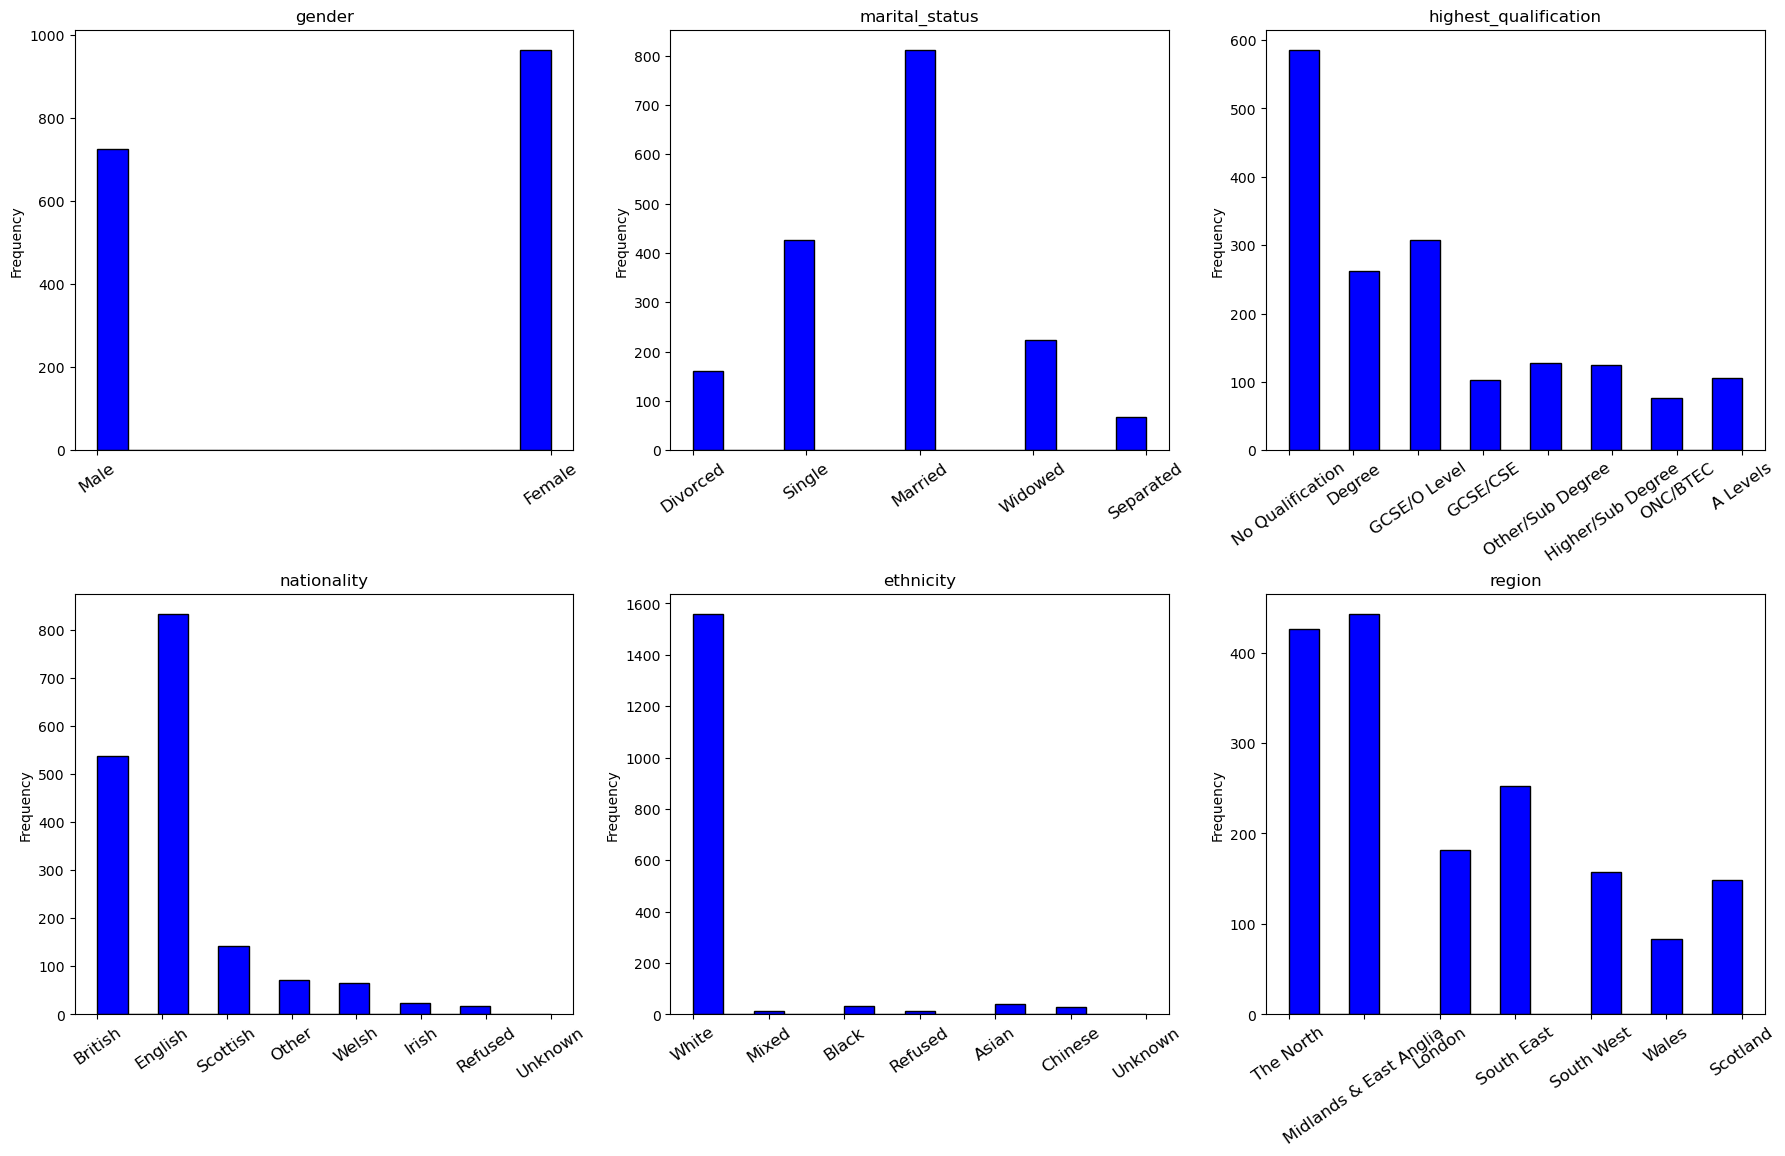

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# List of columns to plot
columns_to_plot = ['gender', 'marital_status', 'highest_qualification', 'nationality', 'ethnicity', 'region']

for i, col in enumerate(columns_to_plot):
    row = i // 3
    col_index = i % 3
    axes[row, col_index].hist(df[col], bins=15, color='blue', edgecolor='black')
    axes[row, col_index].set_title(f"{col}")
    axes[row, col_index].set_ylabel('Frequency')
    axes[row, col_index].tick_params(axis='x', rotation=35, labelsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()


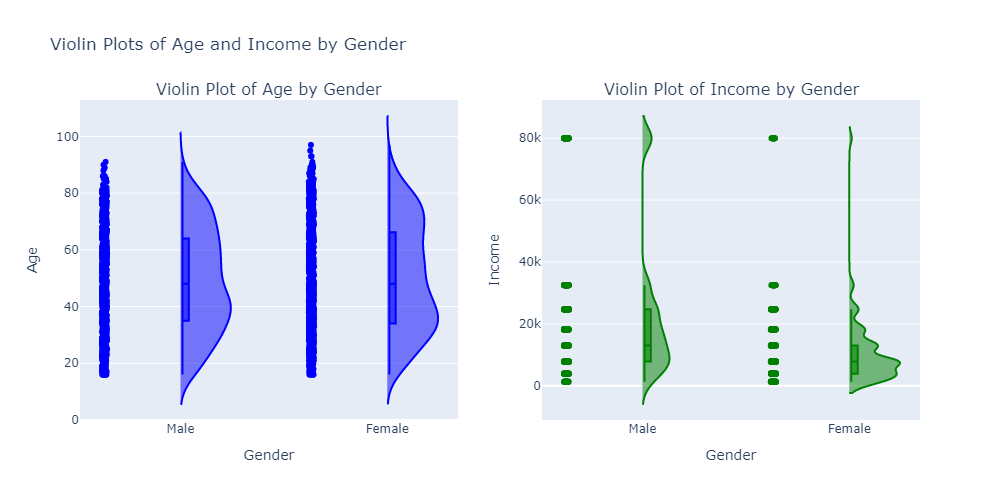

In [13]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=2, subplot_titles=("Violin Plot of Age by Gender", "Violin Plot of Income by Gender"))

# Add the first violin plot for 'age' by 'gender' with dots and boxplot
fig.add_trace(
    go.Violin(x=df['gender'], y=df['age'], box_visible=True, line_color='blue', 
              points='all', name='Age', jitter=0.05, side='positive'),
    row=1, col=1
)

# Add the second violin plot for 'income' by 'gender' with dots and boxplot
fig.add_trace(
    go.Violin(x=df['gender'], y=df['midincome_range'], box_visible=True, line_color='green', 
              points='all', name='Income', jitter=0.05, side='positive'),
    row=1, col=2
)

# Update layout for titles and axis labels
fig.update_layout(
    title_text="Violin Plots of Age and Income by Gender",
    showlegend=False,
    height=500,
    width=1000,
    xaxis1_title="Gender",
    xaxis2_title="Gender",
    yaxis1_title="Age",
    yaxis2_title="Income",
)

# Show the plot
fig.show("png")


Let us examine a bit more closely the topic of smoking in the dataset.

It is clear that the number of smokers are higher for singles and married people, compared to other marital status groups. However, these groups are also larger as a whole so let's calculate the share of smokers in each category.

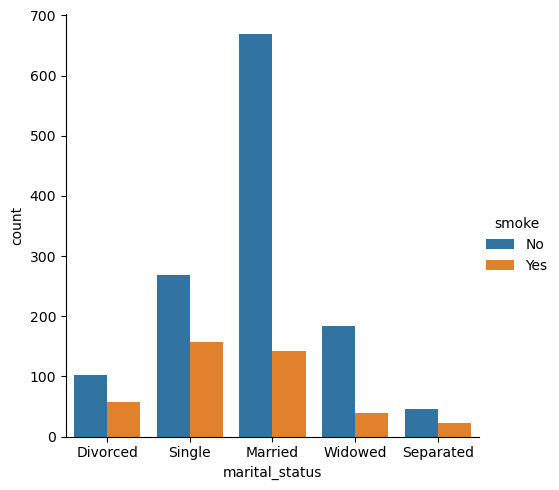

In [15]:
import seaborn as sns
fig = sns.catplot(x="marital_status", hue="smoke", kind="count", data=df)
fig.set_titles('Plot of smokers by marital status')

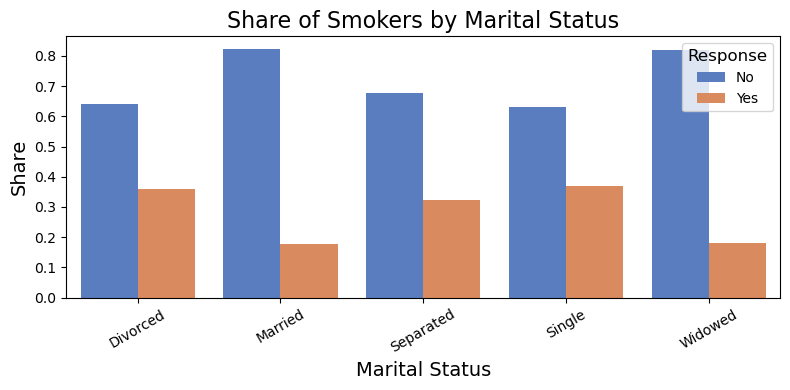

In [16]:
share = (
    df.groupby('marital_status')['smoke']
    .value_counts(normalize=True)
    .rename('share')
    .reset_index()
)
result = share.pivot(index='marital_status', columns='smoke', values='share').fillna(0)
result.reset_index(inplace=True)

melted_result = result.melt(id_vars='marital_status', var_name='Response', value_name='Share')

plt.figure(figsize=(8,4))
sns.barplot(data=melted_result, x='marital_status', y='Share', hue='Response', palette='muted')

plt.title('Share of Smokers by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Share', fontsize=14)
plt.xticks(rotation=30)
plt.legend(title='Response', title_fontsize=12)
plt.tight_layout()

plt.show()



So it is clear that the share of smokers are the highest among divorced, single or separated people.

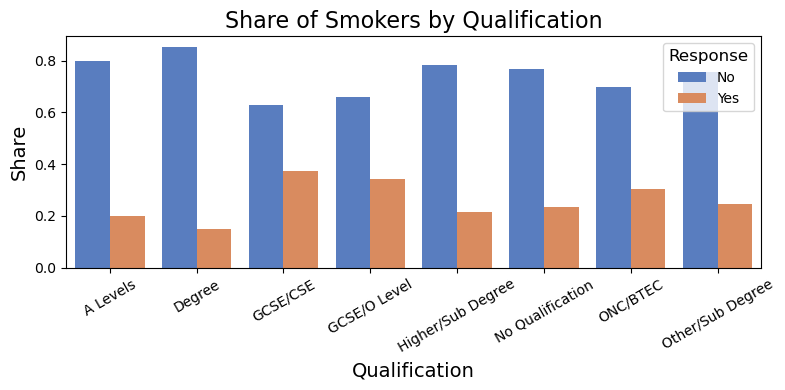

In [17]:
share = (
    df.groupby('highest_qualification')['smoke']
    .value_counts(normalize=True)
    .rename('share')
    .reset_index()
)
result = share.pivot(index='highest_qualification', columns='smoke', values='share').fillna(0)
result.reset_index(inplace=True)

melted_result = result.melt(id_vars='highest_qualification', var_name='Response', value_name='Share')

plt.figure(figsize=(8,4))
sns.barplot(data=melted_result, x='highest_qualification', y='Share', hue='Response', palette='muted')

plt.title('Share of Smokers by Qualification', fontsize=16)
plt.xlabel('Qualification', fontsize=14)
plt.ylabel('Share', fontsize=14)
plt.xticks(rotation=30)
plt.legend(title='Response', title_fontsize=12)
plt.tight_layout()

plt.show()



Doing the same analysis by qualification, it seems that people with GCSE/CSE and GCSE/O level have the highest share of smokers. Lastly, looking at how many people smoke by age and gender it is clear that the median age of smokers is younger than for non-smokers and the median income is also less for smokers.

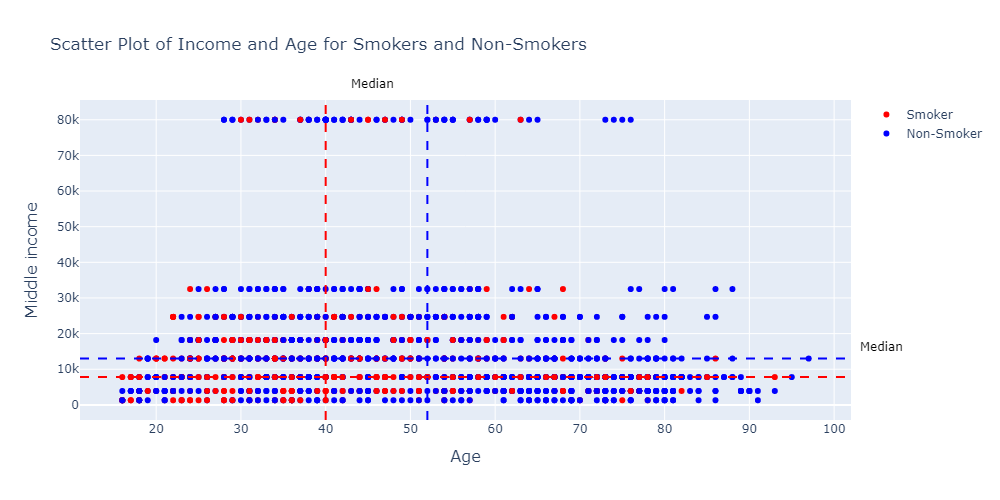

In [94]:
import plotly.express as px
import plotly.graph_objects as go

median_age_smoker = df[df['smoke'] =='Yes']['age'].median()
median_age_nosmoker = df[df['smoke'] =='No']['age'].median()
median_income_smoker = df[df['smoke'] == 'Yes']['midincome_range'].median()
median_income_nosmoker = df[df['smoke'] == 'No']['midincome_range'].median()

fig = make_subplots(rows=1, cols=1)

# Main scatter plot
fig.add_trace(
    go.Scatter(
        x=df['age'],
        y=df['midincome_range'],
        mode='markers',
        marker=dict(color=df['smoke'].map({'Yes': 'red', 'No': 'blue'})),
        showlegend=False  # Exclude from legend
    ),
    row=1, col=1
)

# Add vertical lines for median age
fig.add_vline(x=median_age_smoker, line_dash="dash", line_color="red", xref='x', yref='paper', y0=0, y1=1)
fig.add_vline(x=median_age_nosmoker, line_dash="dash", line_color="blue", xref='x', yref='paper', y0=0, y1=1)

# Add horizontal lines for median income range
fig.add_hline(y=median_income_smoker, line_dash="dash", line_color="red", xref='paper', x0=0, x1=1)
fig.add_hline(y=median_income_nosmoker, line_dash="dash", line_color="blue", xref='paper', x0=0, x1=1)

# Add custom legend entries
fig.add_trace(
    go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(color='red'),
        name='Smoker'
    )
)
fig.add_trace(
    go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(color='blue'),
        name='Non-Smoker'
    )
)

# Add annotations
fig.add_annotation(
    dict(
        font=dict(color='black', size=12),
        align='left',
        x=1.07,
        y=0.2,
        showarrow=False,
        text="Median",
        xref="paper",
        yref="paper",
    )
)
fig.add_annotation(
    dict(
        font=dict(color='black', size=12),
        align='left',
        x=0.38,
        y=1.08,
        showarrow=False,
        text="Median",
        xref="paper",
        yref="paper",
    )
)

# Update layout
fig.update_layout(
    title='Scatter Plot of Income and Age for Smokers and Non-Smokers',
    showlegend=True,
    width=1000,
    height=500,
    xaxis_title=dict(text='Age', font=dict(size=16)),
    yaxis_title=dict(text='Middle income', font=dict(size=16)),
)

# Show plot
fig.show("png")



## Analyzing smoking

Let's turn to see how much the smokers smoke during the weekdays and weekends.

In [18]:
df_smoke_weekends = df[df['amt_weekends'] != 0.0]['amt_weekends'].value_counts().sort_index()
df_smoke_weekdays = df[df['amt_weekdays'] != 0.0]['amt_weekdays'].value_counts().sort_index()

df_smoke = pd.concat([df_smoke_weekends, df_smoke_weekdays], axis=1)
df_smoke.head()

,amt_weekends,amt_weekdays
1.0,6.0,8.0
2.0,7.0,13.0
3.0,6.0,9.0
4.0,4.0,10.0
5.0,32.0,28.0


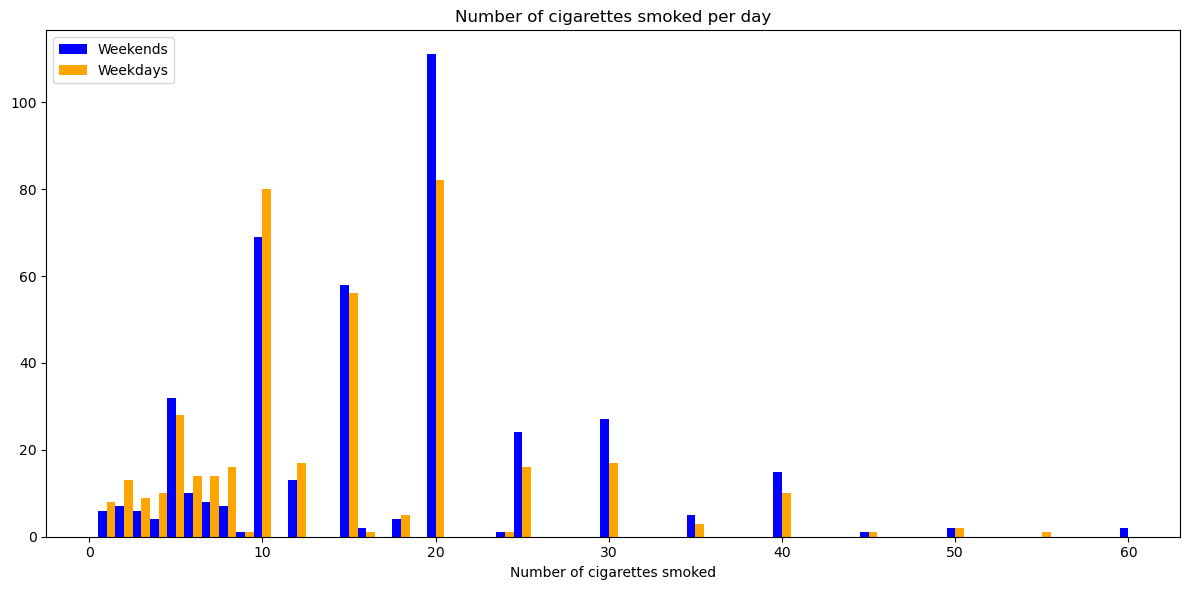

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
categories = ['Weekends', 'Weekdays']
width = 0.5
axes.bar(df_smoke.index- width / 2, df_smoke['amt_weekends'], width=width, label='Weekends', color='blue')
axes.bar(df_smoke.index+ width / 2, df_smoke['amt_weekdays'], width=width, label='Weekdays', color='orange')
axes.set_title('Number of cigarettes smoked per day')
axes.set_xlabel('Number of cigarettes smoked')
axes.legend()

plt.tight_layout()
plt.show()


It seems from the plot that the smokers who generally smoke a lot of cigarettes (i.e. 15 or more per day) also tend to smoke more per day during weekends. Meanwhile those who smoke fewer than ten cigarettes per day tend to smoke on average more during weekdays.

In [20]:
df_smoke = df[df['type'] != 'Non-Smoker']

In [21]:
df_smoke.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,region,smoke,amt_weekends,amt_weekdays,type,lower_income,upper_income,midincome_range
1,Female,42,Single,No Qualification,British,White,The North,Yes,12.0,12.0,Packets,0.0,2600.0,1300.0
6,Male,53,Married,Degree,British,White,The North,Yes,6.0,6.0,Packets,36400.0,inf,80000.0
8,Male,40,Single,GCSE/CSE,English,White,The North,Yes,8.0,8.0,Hand-Rolled,2600.0,5200.0,3900.0
9,Female,41,Married,No Qualification,English,White,The North,Yes,15.0,12.0,Packets,5200.0,10400.0,7800.0
20,Female,34,Married,GCSE/CSE,British,White,The North,Yes,6.0,12.0,Packets,2600.0,5200.0,3900.0


Examining how much people smoke based on nationality and region, it appears that the distribution is fairly uniform across regions. The north and Wales appear to have somewhat higher peaks suggesting a somewhat larger number of people smoking very much, particularly the case for males. 
Across nationality, it seems to be the case that it is most common among English people to smoke 10-20 cigarettes per day. For Irish and Welsh people the distribution is a bit more elongated with more people smoking both less but also more than English. 

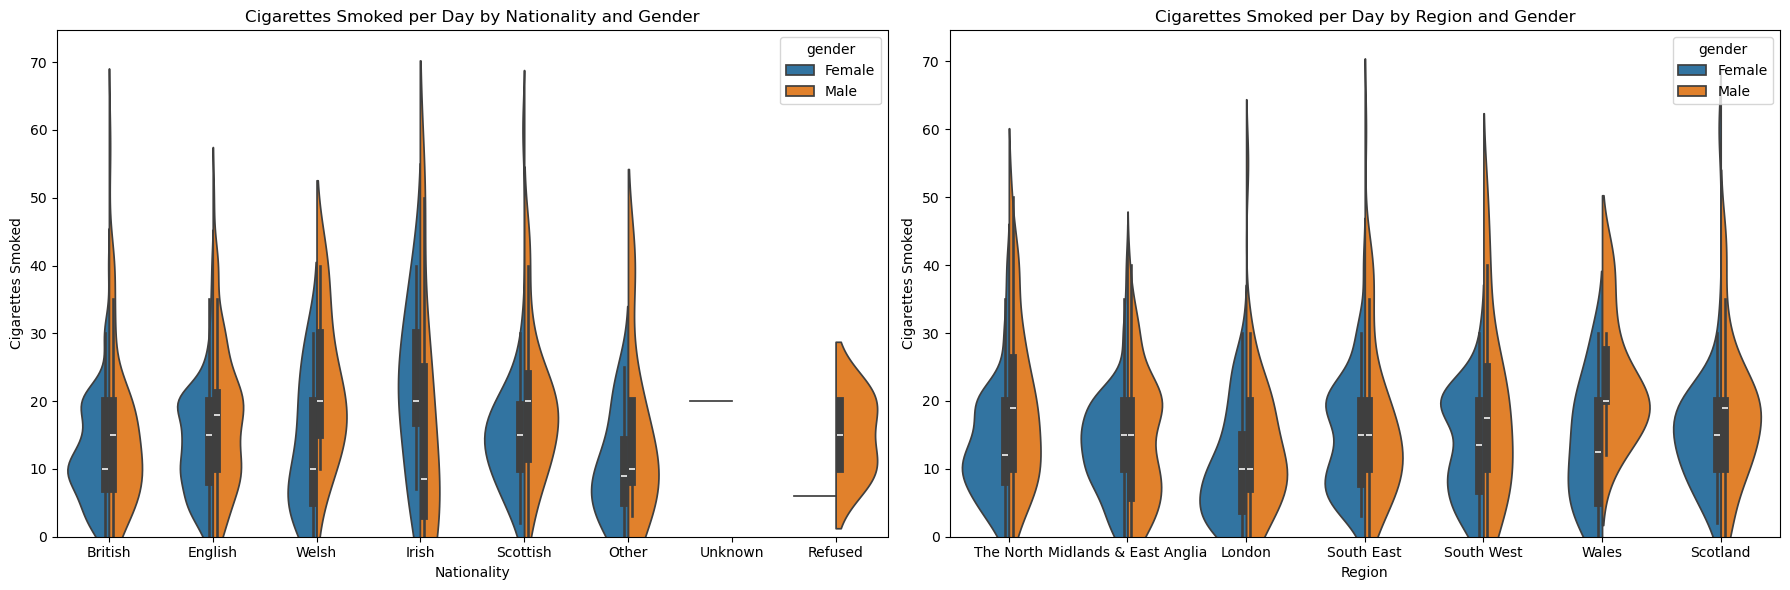

In [29]:
df_melted = pd.melt(df_smoke, id_vars=['nationality', 'region', 'highest_qualification', 'gender'],
                    value_vars=['amt_weekends', 'amt_weekdays'],
                    var_name='week_type', value_name='cigarettes_smoked')

# Create 2 side-by-side violin plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# First violin plot for nationality
sns.violinplot(data=df_melted, x='nationality', y='cigarettes_smoked', hue='gender', ax=axes[0], split=True)
axes[0].set_title('Cigarettes Smoked per Day by Nationality and Gender')
axes[0].set_xlabel('Nationality')
axes[0].set_ylabel('Cigarettes Smoked')
axes[0].set_ylim(0, axes[0].get_ylim()[1])  # Set y-axis to start from 0

# Second violin plot for region
sns.violinplot(data=df_melted, x='region', y='cigarettes_smoked', hue='gender', ax=axes[1], split=True)
axes[1].set_title('Cigarettes Smoked per Day by Region and Gender')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Cigarettes Smoked')
axes[1].set_ylim(0, axes[1].get_ylim()[1])  # Set y-axis to start from 0

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



Lastly looking at what type people typically smoke we can look at a bar plot to examine this. Most commonly packets are used and much less common is hand-rolled cigarettes or a combination.

<AxesSubplot: title={'center': 'Type of smoking'}>

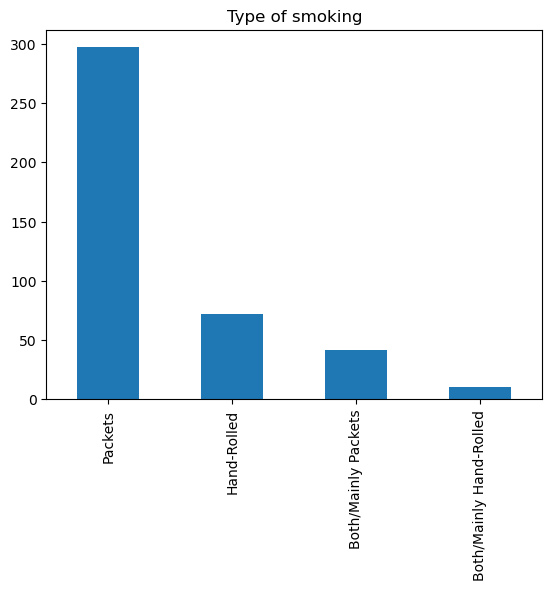

In [93]:
df_smoke['type'].value_counts().plot(kind='bar', title='Type of smoking')